In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
a_df = pd.read_csv('sdelete2.csv')

a_df.loc[:,'y'] = [0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
a_df

,n,appname,appsize,actual,matches,P,y
0,0,Wireshark-W7x64,208542,0,16,0.00008,0
1,1,Wireshark-W7x32,171264,0,36,0.00021,0
2,2,Winzip17pro-W7x32,248414,0,38,0.00015,0
3,3,Winzip17pro-W7x64,271471,0,16,0.00006,0
4,4,sdelete-W7x32,629,629,634,1.00795,1
5,5,sdelete-W7x64,611,611,610,0.99836,1
6,6,OfficePro2003-WinXP,1210957,0,12,0.00001,0
7,7,OfficePro2003-W7x64,702693,150,23829,0.03391,0
8,8,OfficePro2003-W7x32,637903,150,24019,0.03765,0
9,9,Winrar5beta-W7x32,9373,0,20,0.00213,0


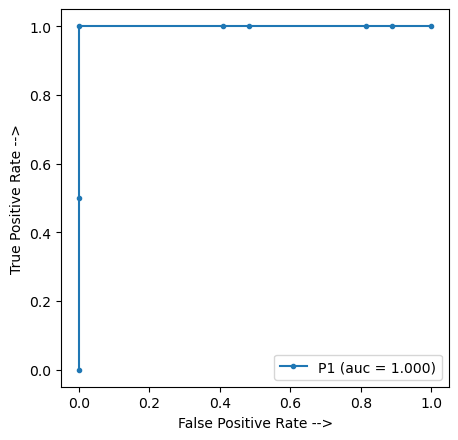

In [7]:
from sklearn.metrics import roc_curve, auc
y_test = a_df.loc[:,'y']
y_pred = a_df.loc[:,'P']
#y_pred_svm = a_df.loc[:,'p2']
fpr, tpr, threshold = roc_curve(y_test, y_pred) #roc_curve(y_test, y_pred)
auc_z = auc(fpr, tpr)

#svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
#auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
#plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM_P2 (auc = %0.3f)' % auc_svm)
plt.plot(fpr, tpr, marker='.', label='P1 (auc = %0.3f)' % auc_z)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

/Users/seunfuta/opt/anaconda3/envs/paper2/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
/Users/seunfuta/opt/anaconda3/envs/paper2/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


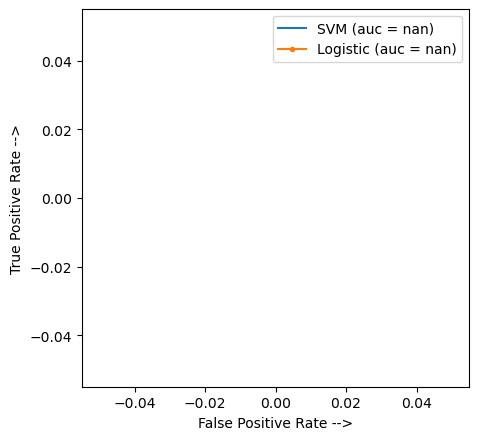

In [16]:
X = a_df.iloc[:,-2:-1].values
y = a_df.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 4)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
from sklearn.svm import SVC
model_SVC = SVC(kernel = 'rbf', random_state = 4)
model_SVC.fit(X_train, y_train)

y_pred_svm = model_SVC.decision_function(X_test)
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

y_pred_logistic = model_logistic.decision_function(X_test)
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()